# Prolexitim NLP Analytics 
## TAS-20 & Text Data. Descriptive and Correlational Analysis
### Dataset from Prolexitim TAS-20 Spain instrument and Prolexitim NLP
<hr>
May 2019.<br> Prolexitim dataset version 1.2 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>

## This notebook contains: 

- TAS-20 + NLP Dataset loading. 
- Sentiment Analysis frequency distribution.
- Sentiment Analysis Results correlational analysis (pre normalization).
- Sentiment Analysis data normalization.
- Sentiment Analysis Results correlational analysis (post normalization, same results).
- TAS-20 Vs. Sentiment correlational analysis.
- TAS-20 Vs. Watson NLU Emotion correlational analysis.
- Difference of means testing
- Normalized data export

### Loading TAS Sentiment dataset

In [1]:
import pandas as pd 
from scipy import stats
import seaborn as sns

tasnlp_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-sentiment-1.2.csv"

tasnlp_df = pd.read_csv(tasnlp_dataset_path,header=0,delimiter="\t")

In [2]:
tasnlp_df.head()

,code,TAS20,F1,F2,F3,alex-a,alex-b,card,G-score,G-magnitude,Azure-TA,nlu-sentiment,nlu-label,nlu-joy,nlu-anger,nlu-fear,nlu-disgust,nlu-sadness,es-len
0,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,13V,-0.2,0.2,0.62,-0.640157,negative,0.317920,0.143086,0.098997,0.422023,0.173421,115
1,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,18NM,-0.5,0.5,0.41,0.000000,neutral,0.285100,0.168727,0.109176,0.057098,0.362623,110
2,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,12VN,0.0,1.2,0.63,0.265769,positive,0.039779,0.205065,0.481812,0.244164,0.164005,93
3,76ef63369f7d5b6597a543017e1ef578,63.0,23.0,21.0,19.0,Alex,Alex,12VN,0.0,0.1,0.89,-0.353556,negative,0.208997,0.007244,0.190991,0.008434,0.698307,255
4,76ef63369f7d5b6597a543017e1ef578,63.0,23.0,21.0,19.0,Alex,Alex,10,0.3,0.1,0.24,-0.552068,negative,0.367801,0.063256,0.103351,0.095947,0.469062,184


### Sentiment Analysis Results - Distribution analysis

Visualizing sentiment analysis scores from:

- Google Cloud - Natural Language API (G-Score, G-Magnitude).
- Microsoft Azure - Text Analytics (Azure-TA). 
- IBM Watson - Natural Language Understanding (nlu-sentiment, nlu-label).

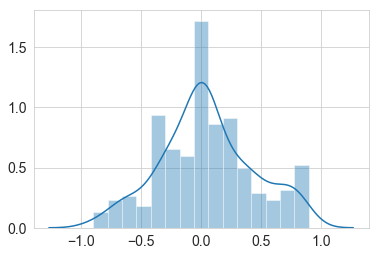

In [40]:
plt.rcParams.update({'font.size': 14})
sns.distplot(tasnlp_df[["G-score"]], bins=15, kde=True)

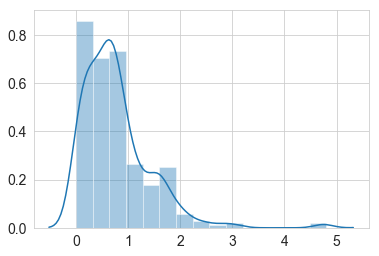

In [41]:
sns.distplot(tasnlp_df[["G-magnitude"]], bins=15, kde=True)

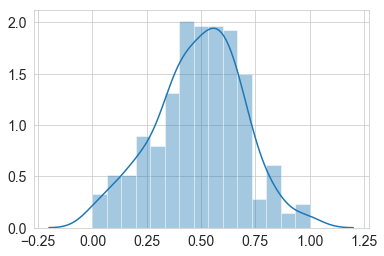

In [42]:
sns.distplot(tasnlp_df[["Azure-TA"]], bins=15, kde=True)

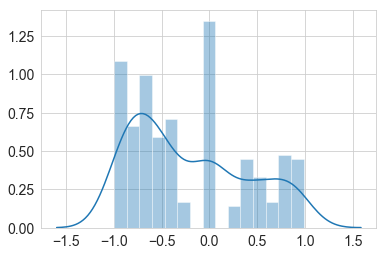

In [43]:
sns.distplot(tasnlp_df[["nlu-sentiment"]], bins=15, kde=True)

In [7]:
tasnlp_df['nlu-label'].value_counts()

negative    178
positive     85
neutral      57
Name: nlu-label, dtype: int64

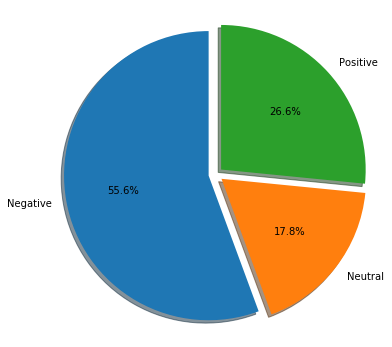

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = 'Negative', 'Neutral', 'Positive'
sizes = [tasnlp_df['nlu-label'].value_counts()["negative"], \
         tasnlp_df['nlu-label'].value_counts()["neutral"], \
         tasnlp_df['nlu-label'].value_counts()["positive"]]
explode = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

### Sentiment Analysis Results - Correlational analysis

Comparing sentiment analysis scores from:

- Google Cloud - Natural Language API (G-Score, G-Magnitude).
- Microsoft Azure - Text Analytics (Azure-TA). 
- IBM Watson - Natural Language Understanding (nlu-sentiment, nlu-label).

Between them. 

In [9]:
corr_sentiment = tasnlp_df[["G-score", "Azure-TA", "nlu-sentiment"]].corr()
corr_sentiment

,G-score,Azure-TA,nlu-sentiment
G-score,1.000000,0.521285,0.578772
Azure-TA,0.521285,1.000000,0.573208
nlu-sentiment,0.578772,0.573208,1.000000


In [10]:
corr_sentiment.style.background_gradient(cmap='coolwarm').set_precision(2)

,G-score,Azure-TA,nlu-sentiment
G-score,1,0.52,0.58
Azure-TA,0.52,1,0.57
nlu-sentiment,0.58,0.57,1


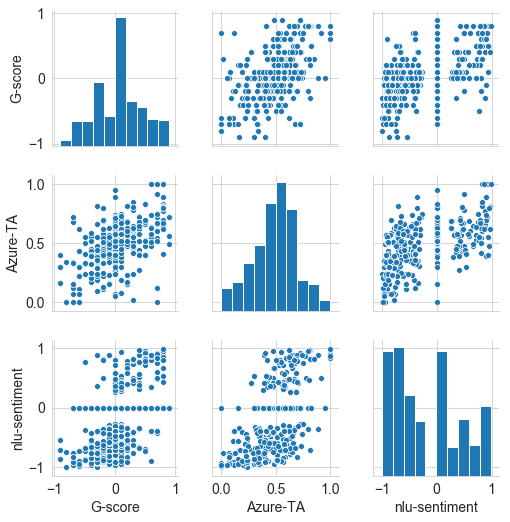

In [44]:
sns.pairplot(tasnlp_df[["G-score", "Azure-TA", "nlu-sentiment"]])

### Sentiment Analysis Results - Data Normalization

Creating normalized variables for:

- Google Cloud - Natural Language API (G-Score, G-Magnitude).
- Microsoft Azure - Text Analytics (Azure-TA). 
- IBM Watson - Natural Language Understanding (nlu-sentiment, nlu-label).


In [12]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [13]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [14]:
# Add new normalized vbles
tasnlp_df.insert(loc=len(tasnlp_df.columns), column='G-score-n', value=0.0)
tasnlp_df.insert(loc=len(tasnlp_df.columns), column='Azure-TA-n', value=0.0)
tasnlp_df.insert(loc=len(tasnlp_df.columns), column='nlu-sentiment-n', value=0.0)

In [15]:
# Add mean sentiment value
tasnlp_df.insert(loc=len(tasnlp_df.columns), column='mean-sentiment', value=0.0)

In [16]:
# Normalized sentiment scores added to the df
tasnlp_df["G-score-n"] = min_max_scaler.fit_transform(tasnlp_df[["G-score"]].values)
tasnlp_df["Azure-TA-n"] = min_max_scaler.fit_transform(tasnlp_df[["Azure-TA"]].values)
tasnlp_df["nlu-sentiment-n"] = min_max_scaler.fit_transform(tasnlp_df[["nlu-sentiment"]].values)

In [17]:
# Calculate mean of normalized sentiments
tasnlp_df["mean-sentiment"] = tasnlp_df[['G-score-n', 'Azure-TA-n', 'nlu-sentiment-n']].mean(axis=1)

In [18]:
# tasnlp_df

### Sentiment Analysis Results - Correlational analysis

Comparing sentiment analysis scores from:

- Google Cloud - Natural Language API (G-Score, G-Magnitude).
- Microsoft Azure - Text Analytics (Azure-TA). 
- IBM Watson - Natural Language Understanding (nlu-sentiment, nlu-label).


In [19]:
corr_sentiment2 = tasnlp_df[["G-score-n", "Azure-TA-n", "nlu-sentiment-n", "mean-sentiment"]].corr()
corr_sentiment2

,G-score-n,Azure-TA-n,nlu-sentiment-n,mean-sentiment
G-score-n,1.000000,0.521285,0.578772,0.816620
Azure-TA-n,0.521285,1.000000,0.573208,0.802176
nlu-sentiment-n,0.578772,0.573208,1.000000,0.892437
mean-sentiment,0.816620,0.802176,0.892437,1.000000


In [20]:
corr_sentiment2.style.background_gradient(cmap='coolwarm').set_precision(2)

,G-score-n,Azure-TA-n,nlu-sentiment-n,mean-sentiment
G-score-n,1,0.52,0.58,0.82
Azure-TA-n,0.52,1,0.57,0.8
nlu-sentiment-n,0.58,0.57,1,0.89
mean-sentiment,0.82,0.8,0.89,1


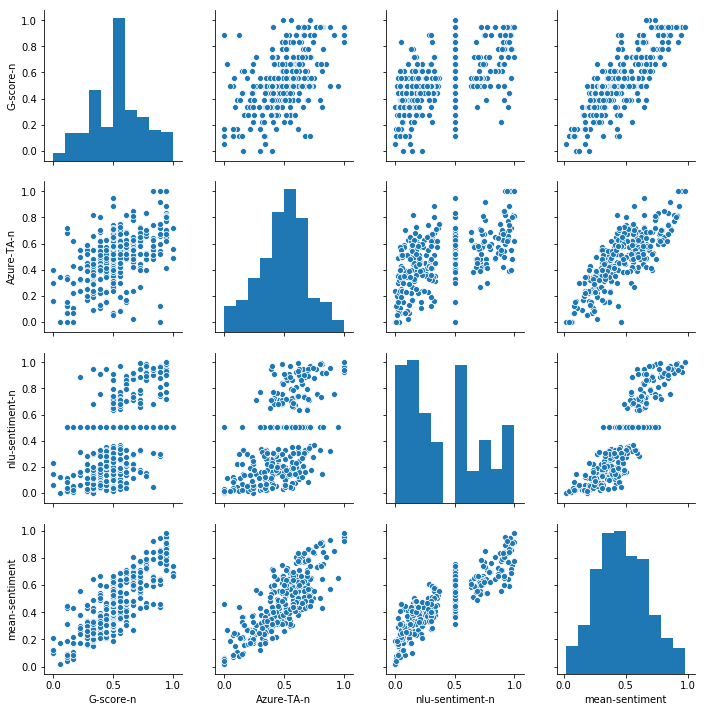

In [21]:
sns.pairplot(tasnlp_df[["G-score-n", "Azure-TA-n", "nlu-sentiment-n", "mean-sentiment"]])

### Sentiment Analysis Results - Correlational analysis

Comparing sentiment analysis scores from:

- Google Cloud - Natural Language API (G-Score, G-Magnitude).
- Microsoft Azure - Text Analytics (Azure-TA). 
- IBM Watson - Natural Language Understanding (nlu-sentiment, nlu-label).

With TAS-20 scores.

In [22]:
corr_sentiment3 = tasnlp_df[["TAS20", "mean-sentiment", "G-magnitude"]].corr()
corr_sentiment3

,TAS20,mean-sentiment,G-magnitude
TAS20,1.000000,-0.036406,-0.111472
mean-sentiment,-0.036406,1.000000,0.061214
G-magnitude,-0.111472,0.061214,1.000000


In [23]:
corr_sentiment3.style.background_gradient(cmap='coolwarm').set_precision(2)

,TAS20,mean-sentiment,G-magnitude
TAS20,1,-0.036,-0.11
mean-sentiment,-0.036,1,0.061
G-magnitude,-0.11,0.061,1


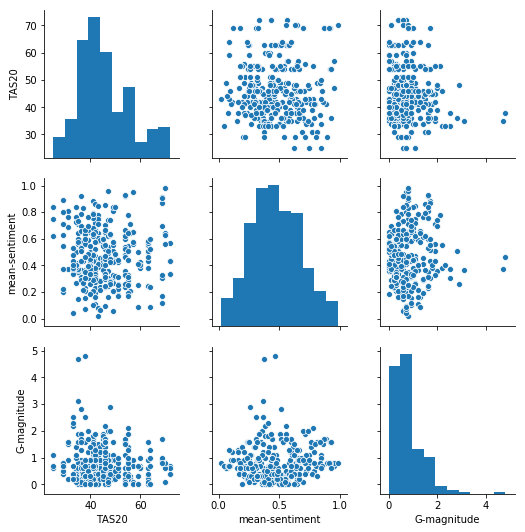

In [24]:
sns.pairplot(tasnlp_df[["TAS20", "mean-sentiment", "G-magnitude"]])

In [25]:
corr_sentiment4 = tasnlp_df[["F1", "F2", "F3", "mean-sentiment", "G-magnitude"]].corr()
corr_sentiment4

,F1,F2,F3,mean-sentiment,G-magnitude
F1,1.000000,0.492906,0.340201,-0.017332,-0.098020
F2,0.492906,1.000000,0.492721,-0.087733,-0.106900
F3,0.340201,0.492721,1.000000,0.028148,-0.044039
mean-sentiment,-0.017332,-0.087733,0.028148,1.000000,0.061214
G-magnitude,-0.098020,-0.106900,-0.044039,0.061214,1.000000


In [26]:
corr_sentiment4.style.background_gradient(cmap='coolwarm').set_precision(2)

,F1,F2,F3,mean-sentiment,G-magnitude
F1,1,0.49,0.34,-0.017,-0.098
F2,0.49,1,0.49,-0.088,-0.11
F3,0.34,0.49,1,0.028,-0.044
mean-sentiment,-0.017,-0.088,0.028,1,0.061
G-magnitude,-0.098,-0.11,-0.044,0.061,1


In [27]:
# Checking the text length

corr_sentiment5 = tasnlp_df[["TAS20","F1", "F2", "F3", "es-len"]].corr()
corr_sentiment5


,TAS20,F1,F2,F3,es-len
TAS20,1.000000,0.782424,0.838895,0.746574,-0.108653
F1,0.782424,1.000000,0.492906,0.340201,-0.068837
F2,0.838895,0.492906,1.000000,0.492721,-0.134428
F3,0.746574,0.340201,0.492721,1.000000,-0.037516
es-len,-0.108653,-0.068837,-0.134428,-0.037516,1.000000


In [28]:
corr_sentiment5.style.background_gradient(cmap='coolwarm').set_precision(2)

,TAS20,F1,F2,F3,es-len
TAS20,1,0.78,0.84,0.75,-0.11
F1,0.78,1,0.49,0.34,-0.069
F2,0.84,0.49,1,0.49,-0.13
F3,0.75,0.34,0.49,1,-0.038
es-len,-0.11,-0.069,-0.13,-0.038,1


### NLU Emotions Analysis Results - Correlational analysis

Comparing emotion analysis scores from:

- IBM Watson - Natural Language Understanding.

With TAS-20 scores.

In [29]:
corr_sentiment5 = tasnlp_df[["F1", "F2", "F3", "nlu-joy", "nlu-sadness", "nlu-disgust", "nlu-fear", "nlu-anger"]].corr()
corr_sentiment5

,F1,F2,F3,nlu-joy,nlu-sadness,nlu-disgust,nlu-fear,nlu-anger
F1,1.000000,0.492906,0.340201,-0.082189,0.035027,-0.037417,0.003869,0.063033
F2,0.492906,1.000000,0.492721,-0.091064,-0.017024,0.101414,-0.009652,0.070821
F3,0.340201,0.492721,1.000000,0.045667,-0.051382,0.005758,-0.106979,-0.086044
nlu-joy,-0.082189,-0.091064,0.045667,1.000000,-0.663668,-0.381669,-0.423008,-0.393994
nlu-sadness,0.035027,-0.017024,-0.051382,-0.663668,1.000000,0.124059,0.124850,-0.048935
nlu-disgust,-0.037417,0.101414,0.005758,-0.381669,0.124059,1.000000,0.111896,0.262741
nlu-fear,0.003869,-0.009652,-0.106979,-0.423008,0.124850,0.111896,1.000000,0.135381
nlu-anger,0.063033,0.070821,-0.086044,-0.393994,-0.048935,0.262741,0.135381,1.000000


In [30]:
corr_sentiment5.style.background_gradient(cmap='coolwarm').set_precision(2)

,F1,F2,F3,nlu-joy,nlu-sadness,nlu-disgust,nlu-fear,nlu-anger
F1,1,0.49,0.34,-0.082,0.035,-0.037,0.0039,0.063
F2,0.49,1,0.49,-0.091,-0.017,0.1,-0.0097,0.071
F3,0.34,0.49,1,0.046,-0.051,0.0058,-0.11,-0.086
nlu-joy,-0.082,-0.091,0.046,1,-0.66,-0.38,-0.42,-0.39
nlu-sadness,0.035,-0.017,-0.051,-0.66,1,0.12,0.12,-0.049
nlu-disgust,-0.037,0.1,0.0058,-0.38,0.12,1,0.11,0.26
nlu-fear,0.0039,-0.0097,-0.11,-0.42,0.12,0.11,1,0.14
nlu-anger,0.063,0.071,-0.086,-0.39,-0.049,0.26,0.14,1


### Difference of means testing

Comparing distributions:

- Google Cloud - Natural Language API (G-Score, G-Magnitude).
- Microsoft Azure - Text Analytics (Azure-TA). 
- IBM Watson - Natural Language Understanding (nlu-sentiment, nlu-label).

In [31]:
# One way ANOVA 
from scipy.stats import f_oneway

stat, p = f_oneway(tasnlp_df["G-score-n"], tasnlp_df["Azure-TA-n"], tasnlp_df["nlu-sentiment-n"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=23.270, p=0.000
Different distributions (reject H0)


In [32]:
# One way ANOVA 
from scipy.stats import f_oneway

stat, p = f_oneway(tasnlp_df["G-score-n"], tasnlp_df["Azure-TA-n"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=5.247, p=0.022
Different distributions (reject H0)


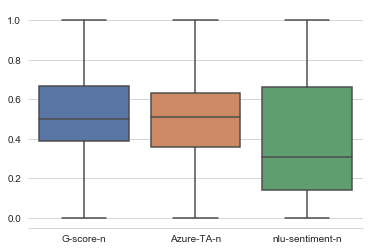

In [33]:
sns.set_style("whitegrid")
sns.boxplot(data=tasnlp_df[["G-score-n", "Azure-TA-n", "nlu-sentiment-n"]], palette="deep")
sns.despine(left=True)

### Normalized data export

In [34]:
tasnlp_df.head()

,code,TAS20,F1,F2,F3,alex-a,alex-b,card,G-score,G-magnitude,...,nlu-joy,nlu-anger,nlu-fear,nlu-disgust,nlu-sadness,es-len,G-score-n,Azure-TA-n,nlu-sentiment-n,mean-sentiment
0,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,13V,-0.2,0.2,...,0.317920,0.143086,0.098997,0.422023,0.173421,115,0.388889,0.62,0.179832,0.396240
1,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,18NM,-0.5,0.5,...,0.285100,0.168727,0.109176,0.057098,0.362623,110,0.222222,0.41,0.503295,0.378506
2,b7adde8a9eec8ce92b5ee0507ce054a4,39.0,12.0,14.0,13.0,NoAlex,NoAlex,12VN,0.0,1.2,...,0.039779,0.205065,0.481812,0.244164,0.164005,93,0.500000,0.63,0.637584,0.589195
3,76ef63369f7d5b6597a543017e1ef578,63.0,23.0,21.0,19.0,Alex,Alex,12VN,0.0,0.1,...,0.208997,0.007244,0.190991,0.008434,0.698307,255,0.500000,0.89,0.324648,0.571549
4,76ef63369f7d5b6597a543017e1ef578,63.0,23.0,21.0,19.0,Alex,Alex,10,0.3,0.1,...,0.367801,0.063256,0.103351,0.095947,0.469062,184,0.666667,0.24,0.224342,0.377003


In [35]:
# Dataset with categorical variables
tasnlp_n_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-sentiment-n-1.2.csv"
tasnlp_df.to_csv(tasnlp_n_dataset_path, sep='\t', encoding='utf-8', index=False)